Sales plays are a significant role in driving the company’s strategies,  generating revenue, and forming the foundation for any organization to grow. It is very important to analyze the customer interactions and factors which lead sales executives to secure a deal also factors that resulted in rejections. Such analysis will provide insight and direct efforts in the correct direction.

Main Goal for this workbook is to clean, append, analyse Grammarly dataset

Importing the Essential Libraries to analyze the data

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql as ps
%matplotlib inline 
import os

Setting up the dataframe and chart parameters which will allow me to have a clear view of the data

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_style('whitegrid')
sns.set_palette('pastel')

Importing the data into dataframe

In [4]:
data = pd.read_csv('grammarly_data.csv')

Checking the first 5 rows of the data



In this dataset, there are 8 columns with values specific to leads/opportunity

In [70]:
data.head()

,id,lead_status,creation_date,status_change,lead_source,deal_size,company_size,company_industry
0,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Commerce and Shopping|Financial Services|Infor...
1,66519272,rejected,2019-12-24,2019-12-24,paid_ads,428,5001-10000,Data and Analytics|Information Technology|Mobi...
2,102989944,converted,2019-09-14,2020-01-05,paid_ads,87,501-1000,Financial Services
3,244285609,rejected,2020-01-27,2020-01-27,consumer_website,128,251-500,Legal
4,255755011,rejected,2020-03-12,2020-03-12,paid_ads,245,251-500,Legal


Check for the data Types and non-null values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91571 entries, 0 to 91570
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                91571 non-null  object
 1   lead_status       91571 non-null  object
 2   creation_date     91571 non-null  object
 3   status_change     91571 non-null  object
 4   lead_source       91569 non-null  object
 5   deal_size         91571 non-null  int64 
 6   company_size      91571 non-null  object
 7   company_industry  91570 non-null  object
dtypes: int64(1), object(7)
memory usage: 5.6+ MB


Checking for Null Values


I noticed that there are null values, 2 in lead_source column  and 1 in company_industry column 

In [7]:
data.isnull().sum()

id                  0
lead_status         0
creation_date       0
status_change       0
lead_source         2
deal_size           0
company_size        0
company_industry    1
dtype: int64

Analysing the NULL Values

I noticed that all the null values are coming from a single lead '5558826289' and it seems that this opportunity is not correctly field because:

1. Company size is not correctly defined, in 2 row its 10K+ and in others its 251-500
2. Deal size also varies significantly


These two reason, I would like to remove this opportunity from analyis and would request further information

In [8]:
data[data['lead_source'].isnull() | data['company_industry'].isnull()]

,id,lead_status,creation_date,status_change,lead_source,deal_size,company_size,company_industry
1585,5558826289,new,2020-03-26,2020-03-26,NaN,35,251-500,Events|Hardware|Media and Entertainment|Music ...
1587,5558826289,new,2020-03-06,2020-03-06,paid_ads,6282,10001+,NaN
1588,5558826289,new,2020-02-03,2020-02-03,NaN,116,251-500,Advertising|Internet Services|Sales and Market...


Removing NULL values and cleaninng the dataframe

In [9]:
data = data[data['id'] != '5558826289']

Reverifying the NULL values

Now we donot have NULL values in the dataset

In [10]:
data.isnull().sum()

id                  0
lead_status         0
creation_date       0
status_change       0
lead_source         0
deal_size           0
company_size        0
company_industry    0
dtype: int64

Check for duplicates

I noticed that we have couple of records which are duplicated and mainly all these records belong to two leads '7210615860', '8182625037'

Analysing individual Leads:
7210615860: On compaing with other rows of same lead_id, I noted that record are repeatative accept first two. It is clear that these are duplicate record so will remove the rest and keep the two

8182625037: I look this read is rejected multiple time with different deal size which suggest although lead_Id is same but other values are unique so I will keep these rows for reference

In [11]:
ids = data["id"]
data[ids.isin(ids[ids.duplicated()])]

,id,lead_status,creation_date,status_change,lead_source,deal_size,company_size,company_industry
91540,7210615860,converted,2020-04-21,2020-04-21,paid_ads,254,251-500,Software
91541,7210615860,converted,2019-09-10,2020-02-12,paid_ads,42,251-500,Software
91542,7210615860,converted,2020-04-21,2020-04-21,paid_ads,254,251-500,Software
91543,7210615860,converted,2019-09-10,2020-02-12,paid_ads,42,251-500,Software
91544,7210615860,converted,2020-04-21,2020-04-21,paid_ads,254,251-500,Software
91545,7210615860,converted,2019-09-10,2020-02-12,paid_ads,42,251-500,Software
91546,7210615860,converted,2020-04-21,2020-04-21,paid_ads,254,251-500,Software
91547,7210615860,converted,2019-09-10,2020-02-12,paid_ads,42,251-500,Software
91548,7210615860,converted,2020-04-21,2020-04-21,paid_ads,254,251-500,Software
91549,7210615860,converted,2019-09-10,2020-02-12,paid_ads,42,251-500,Software


Removing the duplicate rows are keeping the first two

In [12]:
data.drop_duplicates( keep = 'first', inplace = True) 

Check again for duplicate records

Now, data looks like a desired 

In [13]:
ids = data["id"]
data[ids.isin(ids[ids.duplicated()])]

,id,lead_status,creation_date,status_change,lead_source,deal_size,company_size,company_industry
91540,7210615860,converted,2020-04-21,2020-04-21,paid_ads,254,251-500,Software
91541,7210615860,converted,2019-09-10,2020-02-12,paid_ads,42,251-500,Software
91566,8182625037,rejected,2020-03-10,2020-03-10,paid_ads,156,5001-10000,Content and Publishing|Education|Hardware|Info...
91567,8182625037,rejected,2020-03-04,2020-03-10,paid_ads,388,5001-10000,Information Technology|Software
91568,8182625037,rejected,2019-10-17,2020-04-04,paid_ads,421,5001-10000,Artificial Intelligence|Data and Analytics|Inf...
91569,8182625037,rejected,2020-02-28,2020-03-09,paid_ads,463,5001-10000,Administrative Services|Apps|Hardware|Informat...
91570,8182625037,rejected,2019-10-22,2020-03-05,paid_ads,407,5001-10000,Apps|Education|Media and Entertainment|Software


Checking the first 5 rows 

In [14]:
data.head()

,id,lead_status,creation_date,status_change,lead_source,deal_size,company_size,company_industry
0,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Commerce and Shopping|Financial Services|Infor...
1,66519272,rejected,2019-12-24,2019-12-24,paid_ads,428,5001-10000,Data and Analytics|Information Technology|Mobi...
2,102989944,converted,2019-09-14,2020-01-05,paid_ads,87,501-1000,Financial Services
3,244285609,rejected,2020-01-27,2020-01-27,consumer_website,128,251-500,Legal
4,255755011,rejected,2020-03-12,2020-03-12,paid_ads,245,251-500,Legal


Spliting company_industry column values

In [15]:
split_dataframe = pd.DataFrame(data.company_industry.str.split('|').tolist(), index=data.id).stack()
split_dataframe = split_dataframe.reset_index([0, 'id'])
split_dataframe.columns = ['id', 'company_industry']

Merging the two dataframes

In [16]:
sales_data = pd.merge(data.drop('company_industry', 1), split_dataframe, on=['id','id'])

In [17]:
sales_data.head(10)

,id,lead_status,creation_date,status_change,lead_source,deal_size,company_size,company_industry
0,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Commerce and Shopping
1,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Financial Services
2,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Information Technology
3,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Internet Services
4,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Lending and Investments
5,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Software
6,66519272,rejected,2019-12-24,2019-12-24,paid_ads,428,5001-10000,Data and Analytics
7,66519272,rejected,2019-12-24,2019-12-24,paid_ads,428,5001-10000,Information Technology
8,66519272,rejected,2019-12-24,2019-12-24,paid_ads,428,5001-10000,Mobile
9,66519272,rejected,2019-12-24,2019-12-24,paid_ads,428,5001-10000,Sales and Marketing


Checking the shape of the dataframe: we can now see out dataframe length has increase significantly

In [18]:
sales_data.shape

(247196, 8)

Creating Additional column to find the difference between Created Date and Last Status Change date

In [89]:
sales_data['Day_Since_Change'] = (pd.to_datetime(sales_data['status_change']) - 
                                  pd.to_datetime(sales_data['creation_date'])).dt.days

In [90]:
sales_data.head(5)

,id,lead_status,creation_date,status_change,lead_source,deal_size,company_size,company_industry,Day_Since_Change
0,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Commerce and Shopping,1
1,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Financial Services,1
2,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Information Technology,1
3,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Internet Services,1
4,25691639,qualification,2020-03-30,2020-03-31,paid_ads,112,251-500,Lending and Investments,1


Additng another columns which will help me to identity how many industries being listed in indivdual lead_ID and also the top row for further analysis

In [91]:
q1 = """SELECT *, row_number() over(partition by id order by company_industry) as rank FROM sales_data """
sales_data_rank = ps.sqldf(q1, locals())

In [92]:
sales_data_rank.head(5)

,id,lead_status,creation_date,status_change,lead_source,deal_size,company_size,company_industry,Day_Since_Change,rank
0,102989944,converted,2019-09-14,2020-01-05,paid_ads,87,501-1000,Financial Services,113,1
1,1117174955,converted,2019-07-13,2019-12-05,consumer_website,759,501-1000,Financial Services,145,1
2,1143059002,rejected,2020-01-12,2020-01-12,paid_ads,17,5001-10000,Financial Services,0,1
3,1143059002,rejected,2020-01-12,2020-01-12,paid_ads,17,5001-10000,Information Technology,0,2
4,1143059002,rejected,2020-01-12,2020-01-12,paid_ads,17,5001-10000,Internet Services,0,3


Now our dataframe looks as desired, I am extracting this in CSV to use it in Tableau

In [93]:
sales_data_rank.to_csv('grammarly_dataset_.csv', encoding='utf-8')

In [85]:
sales_data_rank.shape

(247196, 10)

## Exploratory Analysis

Distribution of leads based on Status and Source

We can notice that lead source does not significantly varies across all status

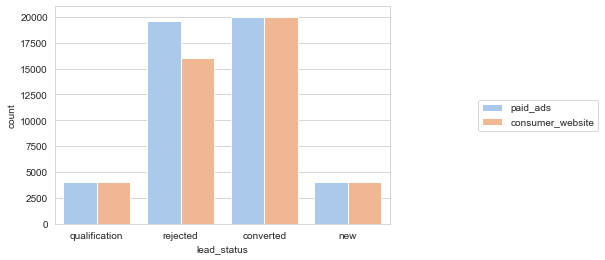

In [21]:
sns.countplot(data['lead_status'], 
              hue= data['lead_source']).legend(loc='center left', 
                                                bbox_to_anchor=(1.25, 0.5), 
                                                ncol=1)

Distribution of leads across industry

Majority of the customers working in software industry followed by financial and healthcare

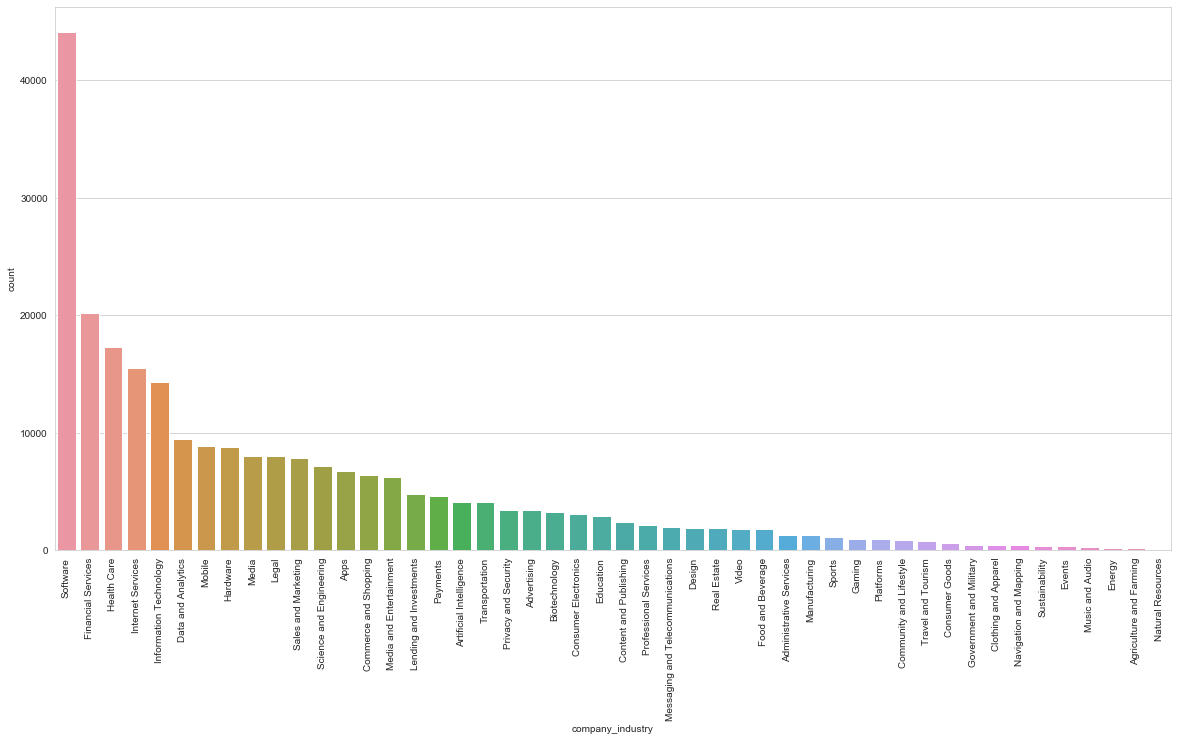

In [22]:
plt.figure(figsize=(20,10))
chart = sns.countplot('company_industry', 
                      data = sales_data,  
                      order = sales_data['company_industry'].value_counts().index)
var = chart.set_xticklabels(chart.get_xticklabels(), 
                            rotation=90)


Count of leads across company size

Majority of the leads belong to company with size between 251-500

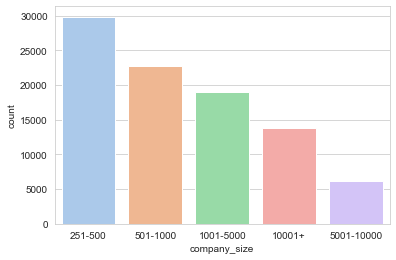

In [23]:
sns.countplot(data['company_size'], 
              order = sales_data['company_size'].value_counts().index)

Distribution of leads across company size and status 

Majority of the convereted leads has comapny size between 501-1000

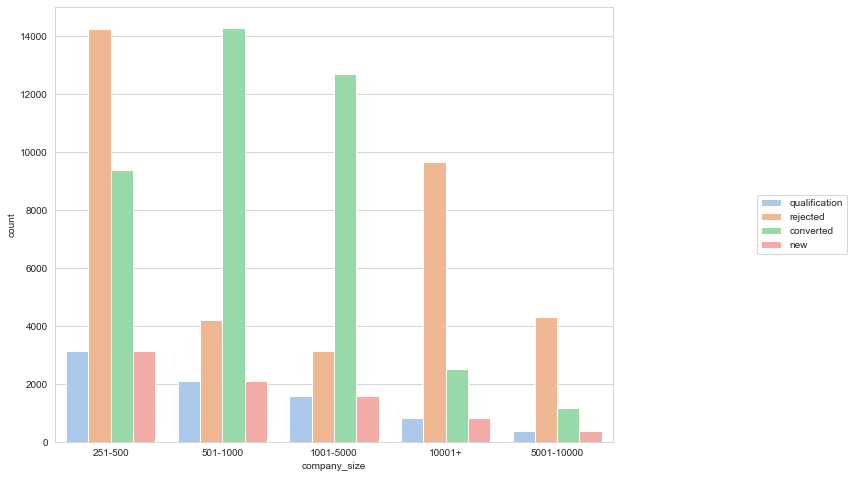

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(data['company_size'], hue = data['lead_status'],
              order = sales_data['company_size'].value_counts().index).legend(loc='center left', 
                                                                                bbox_to_anchor=(1.25, 0.5), 
                                                                                ncol=1)

Distribution of deal size

Shape is skewed towards right 

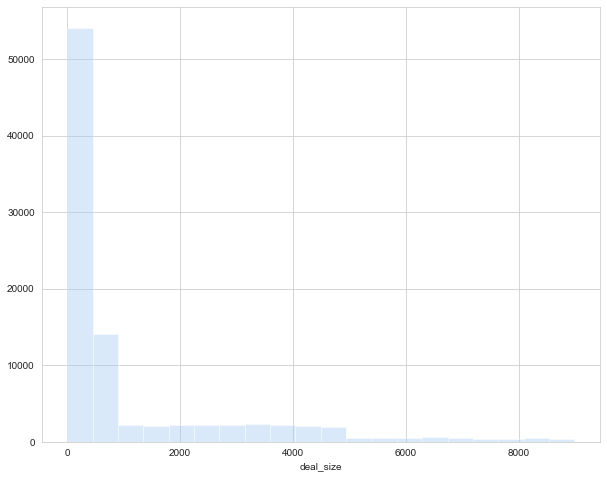

In [25]:
plt.figure(figsize=(10,8))
sns.distplot(data['deal_size'], bins= 20, kde= False)

Deal Size across Company Size

Average deal size is around ~2450 for comapny size 1000-5001

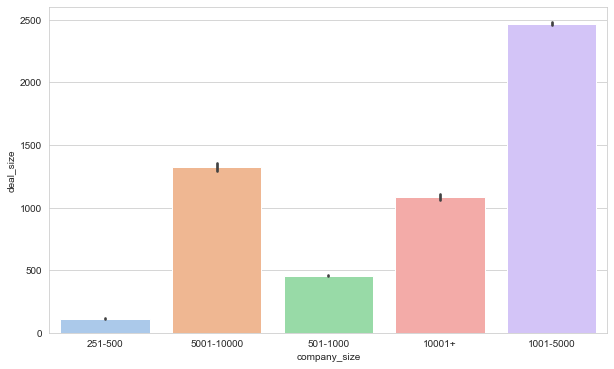

In [62]:
plt.figure(figsize=(10,6))
sns.barplot(sales_data['company_size'], sales_data['deal_size'])

Average day since_last_updated according to lead status  

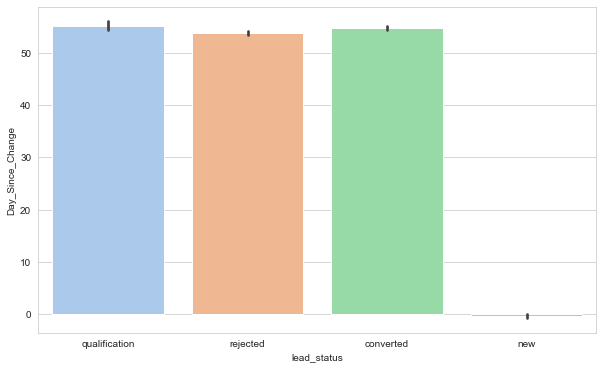

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(sales_data['lead_status'], sales_data['Day_Since_Change'])

Main Goal for this workbook:
    1. Cleaning up data 
    2. Formating data
    3. Addition of new column based on existing ones
    4. Extracting data which can be used as an input for visualization in Tableau
    5. Exploring the data using seaborn

## Thank You!